In [1]:
import pandas as pd
import pathlib, itertools
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt 
import statsmodels
import statsmodels.api as sm
import scipy.stats as stats
import math
from sklearn.cluster import KMeans
import ipyvolume as ipv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBRegressor

In [2]:
HOME_DIR = pathlib.Path.home()
CW_DIR = pathlib.Path.cwd()#sets current working directory
plt.rcParams["axes.labelsize"] = 12#default plot size

In [3]:
listings=pd.read_csv('listings.csv')#reads data

In [4]:
listings.head()#shows top listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2,288,46,0.39,225
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,1,365,0,NaN,150
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,1,212,274,4.64,89
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,1,0,9,0.10,80
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,1,127,75,0.60,200


In [5]:
def anynans(X):
    return np.isnan(X).any()#shows if there are nulls

In [6]:
listings.dtypes#returns data types

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews                   int64
reviews_per_month                 float64
price                               int64
dtype: object

In [7]:
percent_missing = listings.isnull().sum() * 100 / len(listings)

In [8]:
print(percent_missing)#returns percentage missing in each column

id                                 0.000000
name                               0.032744
host_id                            0.000000
host_name                          0.036837
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
minimum_nights                     0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.733055
price                              0.000000
dtype: float64


In [9]:
print(listings.isnull().sum())#host name is not useful to us since we have host_id

id                                    0
name                                 16
host_id                               0
host_name                            18
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews                     0
reviews_per_month                 10131
price                                 0
dtype: int64


In [10]:
#listings.agg(['count', 'size', 'nunique'])
listings.describe()#description stats

,id,host_id,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
count,4.886400e+04,4.886400e+04,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,38733.000000,48864.000000
mean,1.940851e+07,6.943161e+07,40.728664,-73.951850,7.093116,7.438278,112.483505,23.392191,1.365694,151.453176
std,1.124290e+07,8.058217e+07,0.054794,0.046440,20.264170,34.949053,132.373994,44.939690,1.692891,236.585525
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000
25%,9.577635e+06,8.048590e+06,40.689797,-73.982952,1.000000,1.000000,0.000000,1.000000,0.190000,69.000000
50%,1.994839e+07,3.168654e+07,40.722880,-73.955510,2.000000,1.000000,41.000000,5.000000,0.710000,105.000000
75%,2.974014e+07,1.096553e+08,40.762970,-73.935628,5.000000,2.000000,232.000000,24.000000,2.000000,175.000000
max,3.749909e+07,2.830244e+08,40.912400,-73.712990,1250.000000,343.000000,365.000000,639.000000,66.610000,10000.000000


In [11]:
listings.agg(['count', 'size', 'nunique'])#shows the count, size and number of unique values in each column
#host_name: alot of people with the same first name
#lim

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
count,48864,48848,48864,48846,48864,48864,48864,48864,48864,48864,48864,48864,48864,38733,48864
size,48864,48864,48864,48864,48864,48864,48864,48864,48864,48864,48864,48864,48864,48864,48864
nunique,48864,47894,37384,11407,5,222,19103,14816,3,113,46,366,392,952,667


In [12]:
print(listings[listings['name'].isnull()])#to determine if name is MCAR

             id name   host_id host_name neighbourhood_group  \
2787    1615764  NaN   6676776     Peter           Manhattan   
3608    2232600  NaN  11395220      Anna           Manhattan   
5661    4209595  NaN  20700823     Jesse           Manhattan   
5865    4370230  NaN  22686810   Michaël           Manhattan   
6148    4581788  NaN  21600904     Lucie            Brooklyn   
6439    4756856  NaN   1832442  Carolina            Brooklyn   
6477    4774658  NaN  24625694      Josh           Manhattan   
8686    6782407  NaN  31147528  Huei-Yin            Brooklyn   
11763   9325951  NaN  33377685  Jonathan           Manhattan   
12598   9787590  NaN  50448556    Miguel           Manhattan   
12834   9885866  NaN  37306329  Juliette           Manhattan   
13171  10052289  NaN  49522403   Vanessa            Brooklyn   
15557  12797684  NaN  69715276       Yan           Manhattan   
15803  12988898  NaN  71552588    Andrea               Bronx   
17750  14135050  NaN  85288337      Jeff

In [13]:
missing_host_id=listings[listings['name'].isnull()]['host_id']

In [14]:
missing_host_id=missing_host_id.to_numpy()

#print(listings[listings['host_id']==missing_host_id])

In [15]:
listings.loc[listings['host_id'].isin(missing_host_id)]#seems to be missing completely at random since the missing host_names have their names on other listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
2787,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,1000,1,362,0,NaN,400
3608,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,1,1,51,28,0.44,200
5661,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,1,1,0,1,0.02,225
5865,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,7,1,0,5,0.09,215
6148,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,1,1,0,0,NaN,150
6439,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,1,1,0,0,NaN,70
6477,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,1,1,0,0,NaN,40
8686,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,1,1,0,0,NaN,45
11763,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,4,1,0,1,0.02,190
12598,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,5,5,0,0,NaN,300


In [16]:
listings.drop(['id','host_name'], axis=1, inplace=True)#the id and the host_name are not relevant columns since we have the host_id to identify hosts
#trans_listings = listings[listings['name'].notnull()]

In [17]:
print(listings[listings['reviews_per_month'].isnull()])#Nan reviews_per_month values seem to be coming from number_of_reviews being 0

                                                    name    host_id  \
1                    THE VILLAGE OF HARLEM....NEW YORK !       4632   
18                     Huge 2 BR Upper East  Cental Park      17985   
24     Magnifique Suite au N de Manhattan - vue Cloitres      26394   
34                           Clean and Quiet in Brooklyn       7355   
36                             Country space in the city      45445   
...                                                  ...        ...   
48859                            Overnighter / Weekender  283024389   
48860                     East Harlem's Best Kept Secret     299391   
48861  Perfect, Brand New 1 Bedroom Apartment In Midtown  113464126   
48862                Large bedroom overlooking Riverside    7941569   
48863  Brand New Spacious 1 Bedroom Apt In Hells Kitchen  132699715   

      neighbourhood_group        neighbourhood  latitude  longitude  \
1               Manhattan               Harlem  40.80902  -73.94190   
18   

In [18]:
listings[listings['reviews_per_month'].isnull()].agg(['count', 'size', 'nunique'])

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
count,10121,10131,10131,10131,10131,10131,10131,10131,10131,10131,10131,0,10131
size,10131,10131,10131,10131,10131,10131,10131,10131,10131,10131,10131,10131,10131
nunique,9971,8263,5,191,7644,6667,3,88,43,365,1,0,513


In [19]:
listings.fillna({'reviews_per_month':0.00}, inplace=True)#the number of reviews for all of the missing reviews_per_month
#values are all 0. Hence, it is logical to assume that the reviews per month should also be 0.00

In [20]:
listings_copy=listings.copy()#one dataframe for testing without text featurs
listings['name'] = listings['name'].fillna('')#one dataframe for testing WITH text features

In [21]:
listings_copy=listings_copy.drop(columns=['name'])#doing one analysis WITHOUT text features and one WITH

In [22]:
percent_missing = listings.isnull().sum() * 100 / len(listings)
percent_missing_copy=listings_copy.isnull().sum() * 100 / len(listings_copy)

In [23]:
print(percent_missing)#confirms if missing values were cleaned up

name                              0.0
host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
minimum_nights                    0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
price                             0.0
dtype: float64


In [24]:
print(percent_missing_copy)

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
minimum_nights                    0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
price                             0.0
dtype: float64


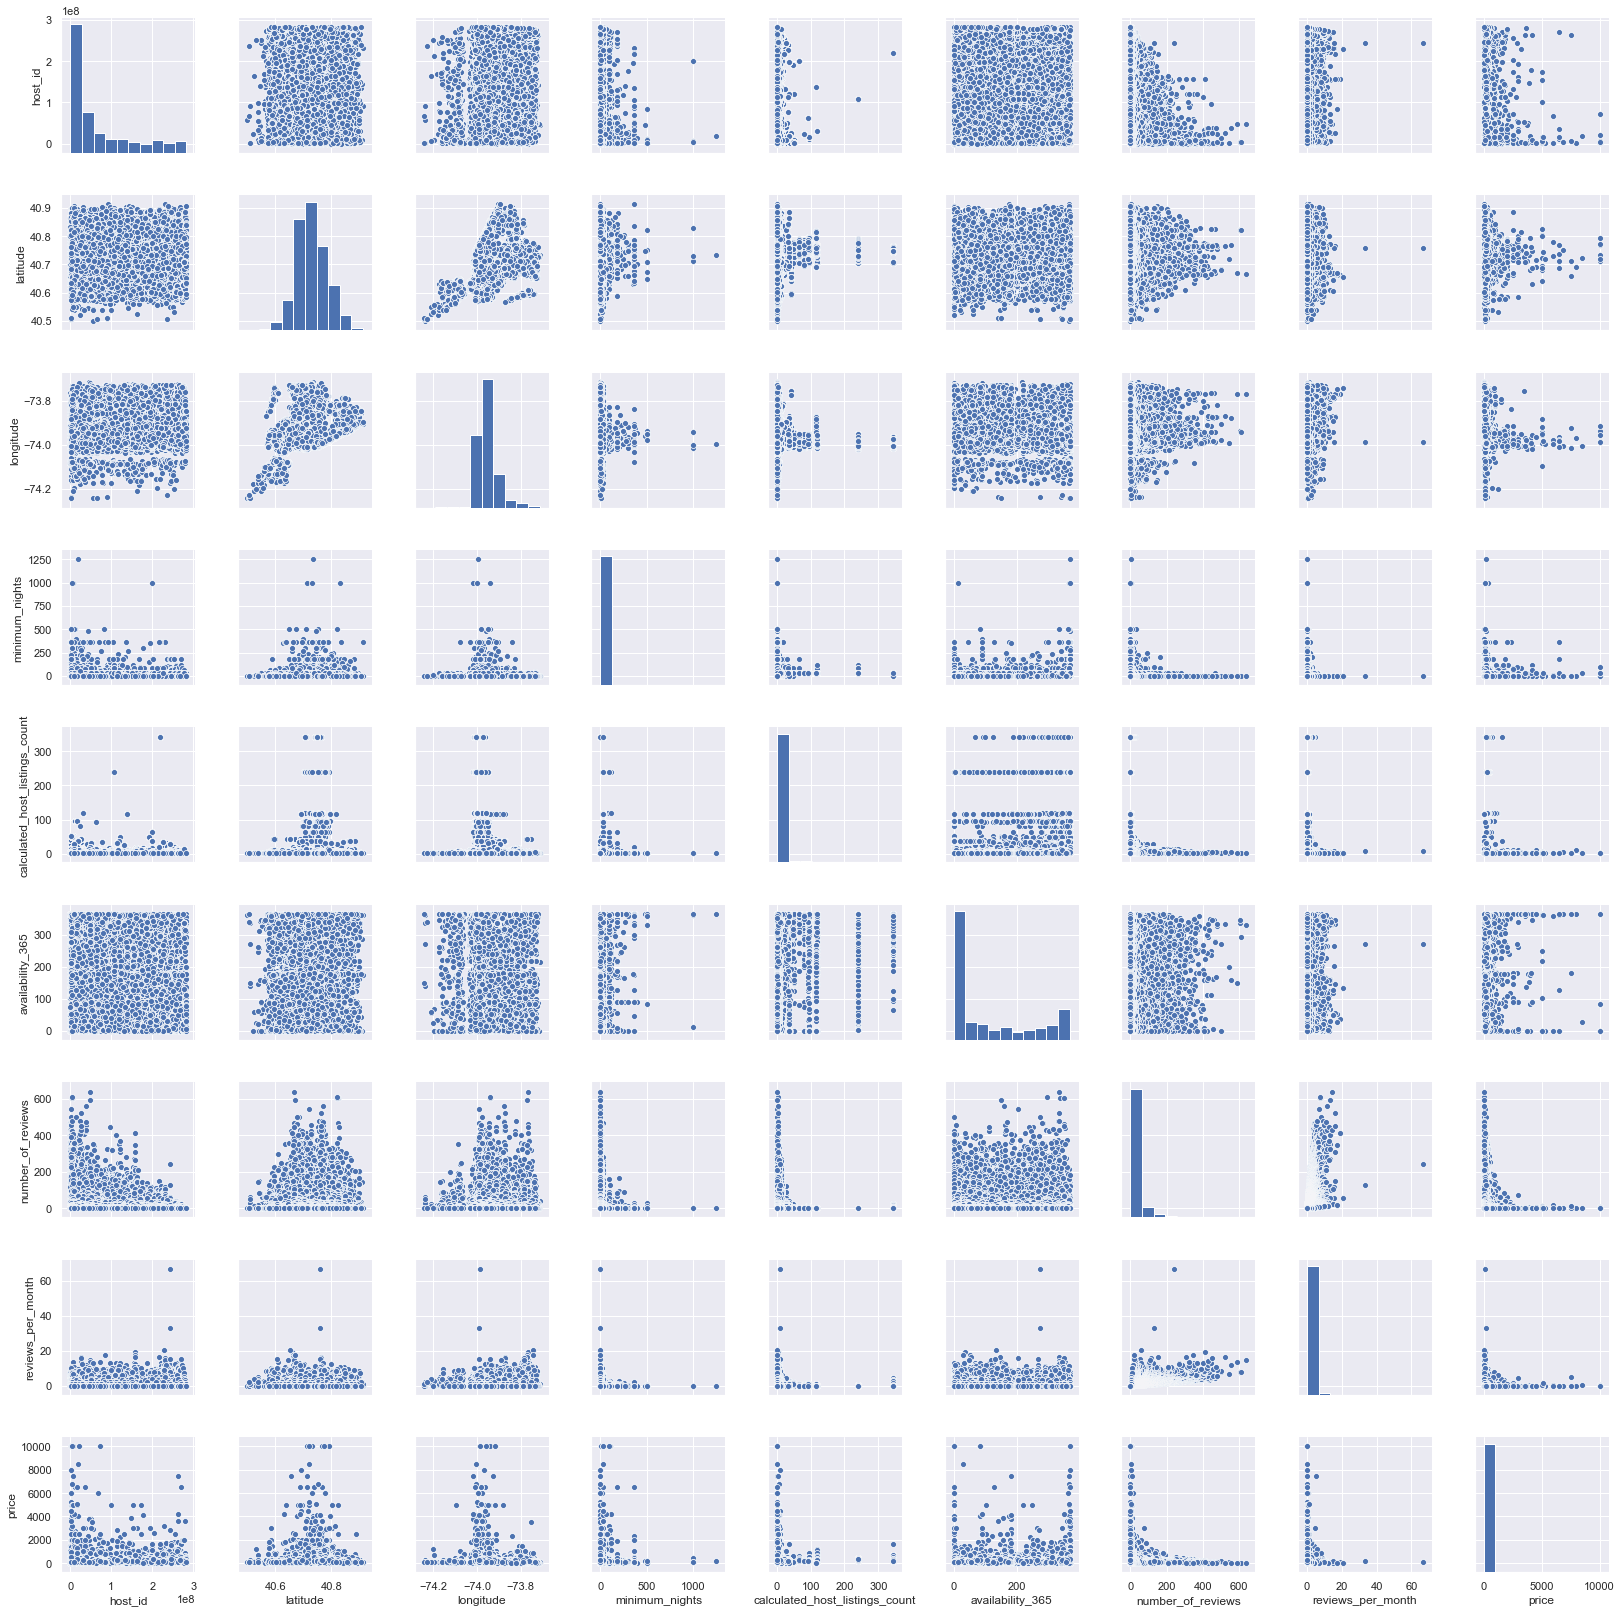

In [25]:
sns.set()
sns.pairplot(listings)#does a scatterplot of each feature with other features to see any correlations/distributions of the  features

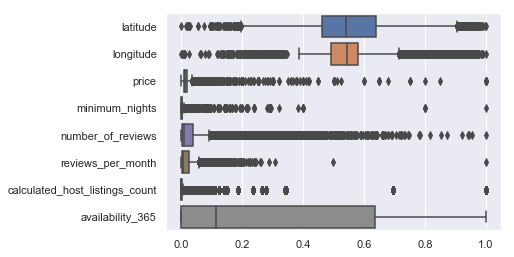

In [26]:
scaler = preprocessing.MinMaxScaler()
features = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
scaled = pd.DataFrame(scaler.fit_transform(listings[features]), columns=features)
sns.boxplot(data=scaled, orient='h')
#Latitude and longitude have normal distributions. The other variables are skewed to the right. This is due to alot of low values 

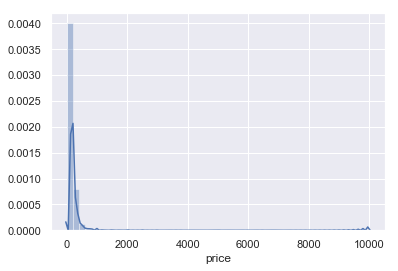

In [27]:
#price, minimum nights, number of reviews, reviews_per_month, and calculated_host_listings_count are rightly skewed
sns.distplot(listings['price'])#shows outliers

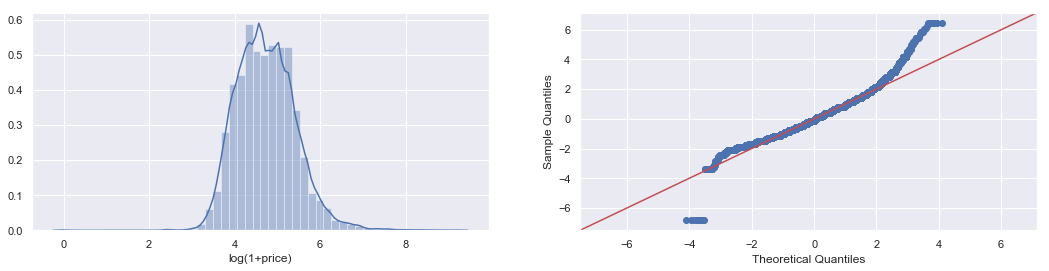

In [28]:
fig, axes = plt.subplots(1,2, figsize=(18,4))
sns.distplot(np.log1p(listings['price']), ax=axes[0])
axes[0].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(listings['price']), stats.norm, fit=True, line='45', ax=axes[1]);#does a log price transformation
#of target variable in order to maintain homoskedasticity assumption for linear regression

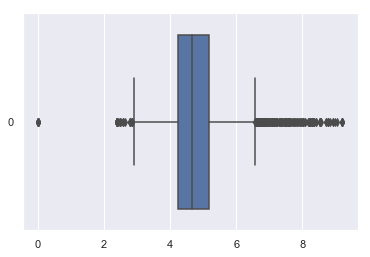

In [29]:
listings['price']=np.log1p(listings['price'])
sns.boxplot(data=listings['price'], orient='h')#shows new and transformed box plot

In [30]:
listings=listings[listings['price']>0] #dropping the 0 price
listings_copy=listings_copy[listings_copy['price']>0] #dropping the 0 price entry
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1
print(len(listings[(listings['price'] < (Q1 - 1.5 * IQR)) |(listings['price'] > (Q3 + 1.5 * IQR))]))
#gets a sense for how many price outliers there are

598


In [31]:
x = np.cos(listings['latitude']) * np.cos(listings['longitude'])
y = np.cos(listings['latitude']) * np.sin(listings['longitude'])
z = np.sin(listings['latitude'])
df2=listings_copy.copy()
listings['x']=x
listings['y']=y
listings['z']=z
listings_copy['x']=x
listings_copy['y']=y
listings_copy['z']=z
#transforms latitude and longitude into x,y,z coordinates since latitude and longitude are 2-D coordinates used to represente 3-D space

c:\users\ajeet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\ajeet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ajeet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [32]:
listings['x'].describe()#summary stats for x


count    48854.000000
mean        -0.123020
std          0.045586
min         -0.382992
25%         -0.153860
50%         -0.126742
75%         -0.107171
max          0.113532
Name: x, dtype: float64

In [33]:
listings['y'].describe()#summary stats for y


count    48854.000000
mean        -0.983510
std          0.008475
min         -0.999996
25%         -0.989320
50%         -0.983878
75%         -0.979613
max         -0.863053
Name: y, dtype: float64

In [34]:
listings['z'].describe()#summary stats for z

count    48854.000000
mean         0.111639
std          0.054408
min         -0.071634
25%          0.077656
50%          0.117532
75%          0.150332
max          0.334349
Name: z, dtype: float64

In [35]:
fig = ipv.figure(height=600, width=600, layout={'width':'100%', 'height':'100%'})
scatter = ipv.scatter(x, y, z, size=1, marker="sphere")
#ipv.quickscatter(x, y, z, size=1, marker="sphere")
ipv.xyzlim(-0.5, 0.5)
display(fig)#shows 3-D representation of New York plotted. The z-statistic could be important since units that are higher
#up could cost more intuitively

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

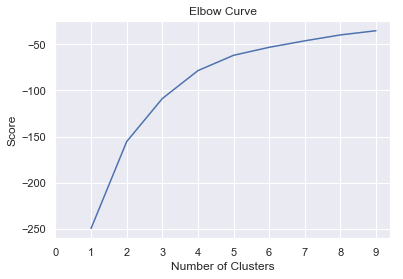

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price', 'x', 'y', 'z'],
      dtype='object')


In [36]:
clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in clusters]
Z_axis = listings[['x','y','z']]
#X_axis = listings[['longitude']]
score = [kmeans[i].fit(Z_axis).score(Z_axis) for i in range(len(kmeans))]
# Visualize
x = [0,1,2,3,4,5,6,7,8,9]
# create an index for each tick position
xi = list(range(len(x)))
plt.plot(clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(xi,x)
plt.title('Elbow Curve')
plt.show()
print(listings.columns)#using clustering approach to group (x,y,z) points that are close together

In [37]:
#While there is no obvious number of clusters to use from the elbow graph above, the benefits seem to taper off after 4


In [39]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(listings[listings.columns[13:16]]) # Compute k-means clustering.
listings['cluster_label'] = kmeans.fit_predict(listings[listings.columns[13:16]])
listings_copy['cluster_label']=kmeans.fit_predict(listings_copy[listings_copy.columns[13:16]])#assigns cluster labels to each
#coordinate based on proximity
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(listings[listings.columns[13:16]]) # Labels of each point
listings.head(10)

c:\users\ajeet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price,x,y,z,cluster_label
0,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2,288,46,0.39,5.420535,-0.155116,-0.984060,0.086974,3
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,3,1,365,0,0.00,5.017280,-0.114165,-0.992957,0.031679,1
2,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,1,212,274,4.64,4.499810,-0.130353,-0.979287,0.154938,0
3,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,1,0,9,0.10,4.394449,-0.116195,-0.992330,0.042182,1
4,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,1,127,75,0.60,5.303305,-0.146402,-0.984853,0.092900,3
5,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,1,0,49,0.39,4.110874,-0.126666,-0.980041,0.153219,0
6,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2,1,239,434,3.48,4.382027,-0.156402,-0.984785,0.075742,3
7,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,2,1,0,118,0.98,4.382027,-0.139242,-0.989493,0.038915,1
8,Best Hideaway,7516,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,30,1,322,94,0.74,4.762174,-0.150510,-0.982149,0.112824,3
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1,4,0,161,1.33,5.017280,-0.160911,-0.978774,0.126921,3


In [40]:
listings = listings.drop(columns=['latitude','longitude','x','y','z'])
listings_copy=listings_copy.drop(columns=['latitude','longitude','x','y','z'])
print(listings.columns)
print(listings_copy.columns)#shows columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price', 'cluster_label'],
      dtype='object')
Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price', 'cluster_label'],
      dtype='object')


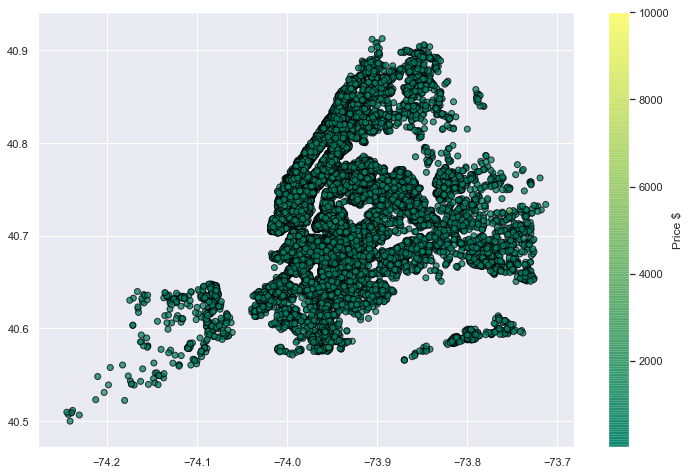

In [41]:
plt.figure(figsize=(12, 8))
plt.scatter(df2.longitude, df2.latitude, c=df2.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')#there does not seem to be a high correlation between latitude, longitude and price
#but perhaps the more expensive areas are covered by the green dots. The z coordinate can be significant in this case

In [42]:
Q1 = listings['availability_365'].quantile(0.25)
Q3 = listings['availability_365'].quantile(0.75)
IQR = Q3 - Q1
print(len(listings[(listings['availability_365'] < (Q1 - 1.5 * IQR)) |(listings['availability_365'] > (Q3 + 1.5 * IQR))]))
#shows outliers

0


In [43]:
Q1 = listings['number_of_reviews'].quantile(0.25)
Q3 = listings['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
print(len(listings[(listings['number_of_reviews'] < (Q1 - 1.5 * IQR)) |(listings['number_of_reviews'] > (Q3 + 1.5 * IQR))]))
#shows outliers

6034


In [44]:
Q1 = listings['reviews_per_month'].quantile(0.25)
Q3 = listings['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1
print(len(listings[(listings['reviews_per_month'] < (Q1 - 1.5 * IQR)) |(listings['reviews_per_month'] > (Q3 + 1.5 * IQR))]))
#shows outliers

3419


In [45]:
Q1 = listings['calculated_host_listings_count'].quantile(0.25)
Q3 = listings['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1
print(len(listings[(listings['calculated_host_listings_count'] < (Q1 - 1.5 * IQR)) |(listings['calculated_host_listings_count'] > (Q3 + 1.5 * IQR))]))
#shows outliers

7076


Text(0, 0.5, 'Count')

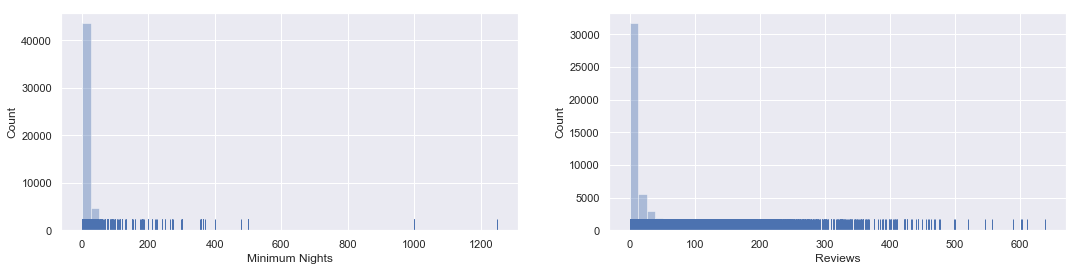

In [46]:
fig, axes = plt.subplots(1,2, figsize=(18,4))

sns.distplot(listings['minimum_nights'], kde=False, rug=True, ax = axes[0])
axes[0].set_xlabel('Minimum Nights')
axes[0].set_ylabel('Count')

sns.distplot(listings['number_of_reviews'], kde=False, rug=True, ax = axes[1])
axes[1].set_xlabel('Reviews')
axes[1].set_ylabel('Count')
#both are heavily skewed to the right. I am thinking to get rid of any minimum night stays that are above 365 days
#make 

In [48]:
df3=listings_copy.copy()
listings=listings[listings['minimum_nights']<=365]
listings_copy=listings_copy[listings_copy['minimum_nights']<=365]#removing data points where minimum nights is greater than
#365. this does not make sense and I am assuming that the stay cannot be longer than a year

Text(0, 0.5, 'Count')

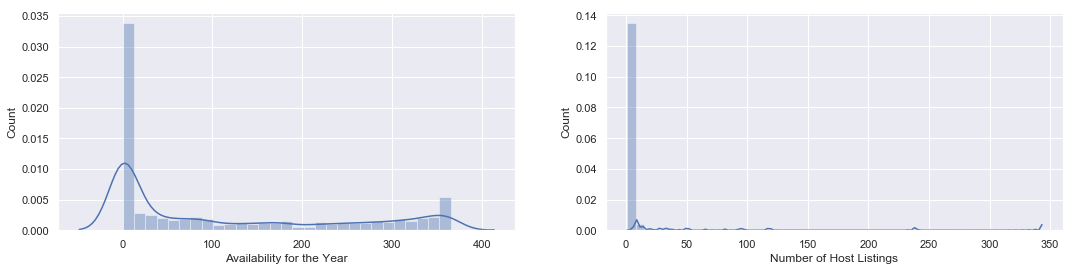

In [49]:
fig, axes = plt.subplots(1,2, figsize=(18,4))

sns.distplot(listings['availability_365'], ax = axes[0])
axes[0].set_xlabel('Availability for the Year')
axes[0].set_ylabel('Count')

sns.distplot(listings['calculated_host_listings_count'], ax = axes[1])
axes[1].set_xlabel('Number of Host Listings')
axes[1].set_ylabel('Count')#shows distribution of availability and host listings

In [50]:
a=[len(listings[listings['minimum_nights']<3])/len(listings),
len(listings[listings['calculated_host_listings_count']<2])/len(listings),
len(listings[listings['number_of_reviews']<5])/len(listings),
len(listings[listings['availability_365']<6])/len(listings),   
len(listings[listings['reviews_per_month']<1])/len(listings)]
for i in a:
    print(i)#playing with the numbers to see what percentage of observations are comprised of lower values

0.5006449499396
0.6590364652648389
0.4744374603304601
0.39651112794578325
0.6604492127515816


In [51]:
df3=listings.copy()
listings['low_avail'] = listings['availability_365']<6#creates piece-wise element to each of the numeric variables
#since they are heavily skewed to the right. Takes high small frequencies and makes them a separate feature
listings['low_nights'] = listings['minimum_nights']< 3
listings['no_reviews'] = listings['reviews_per_month']==0
listings['low_reviews'] = listings['number_of_reviews']<5#since the distributions are skewed to the right. This adds a piece
#wise element to the regression by weighting lower values more

In [52]:
listings.groupby('neighbourhood_group', as_index=False)['price'].mean().sort_values(by=['price'])#From highest to lowest price: Manhattan, Brooklyn
#Staten Island, Queens, Bronx

,neighbourhood_group,price
0,Bronx,4.263594
3,Queens,4.379170
4,Staten Island,4.397977
1,Brooklyn,4.578436
2,Manhattan,5.005256


In [53]:
listings.groupby('neighbourhood', as_index=False)['price'].mean().sort_values(by=['price']) #as expected,
#within each borough, there is a variation in the price of the Airbnb. So it would be wise to commbine both the neighbourhood and neighbourhood_group

,neighbourhood,price
88,Graniteville,3.660594
27,Bull's Head,3.780475
197,Tremont,3.840318
136,Mount Eden,3.901788
103,Hunts Point,3.908886
...,...,...
216,Willowbrook,5.703782
198,Tribeca,5.733462
220,Woodrow,6.552508
83,Fort Wadsworth,6.685861


In [54]:
df4=listings.copy()

listings['area']=listings['neighbourhood'] + ',' + listings['neighbourhood_group']#merges these two features to reduce feature
#space

In [55]:
listings_copy['area']=listings_copy['neighbourhood'] + ',' + listings_copy['neighbourhood_group']
listings_copy=listings_copy.drop(columns=['neighbourhood','neighbourhood_group'])
listings=listings.drop(columns=['neighbourhood','neighbourhood_group'])

In [56]:
listings.groupby('area', as_index=False)['price'].mean().sort_values(by=['price'])#shows price variation in each borough

,area,price
88,"Graniteville,Staten Island",3.660594
27,"Bull's Head,Staten Island",3.780475
197,"Tremont,Bronx",3.840318
136,"Mount Eden,Bronx",3.901788
103,"Hunts Point,Bronx",3.908886
...,...,...
216,"Willowbrook,Staten Island",5.703782
198,"Tribeca,Manhattan",5.733462
220,"Woodrow,Staten Island",6.552508
83,"Fort Wadsworth,Staten Island",6.685861


In [57]:
#As seen from here, some of the cheapest and most expensive AirBnBs are in the Bronx and Staten Island. This shows the wide variation
#within boroughs
listings.columns

Index(['name', 'host_id', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price', 'cluster_label',
       'low_avail', 'low_nights', 'no_reviews', 'low_reviews', 'area'],
      dtype='object')

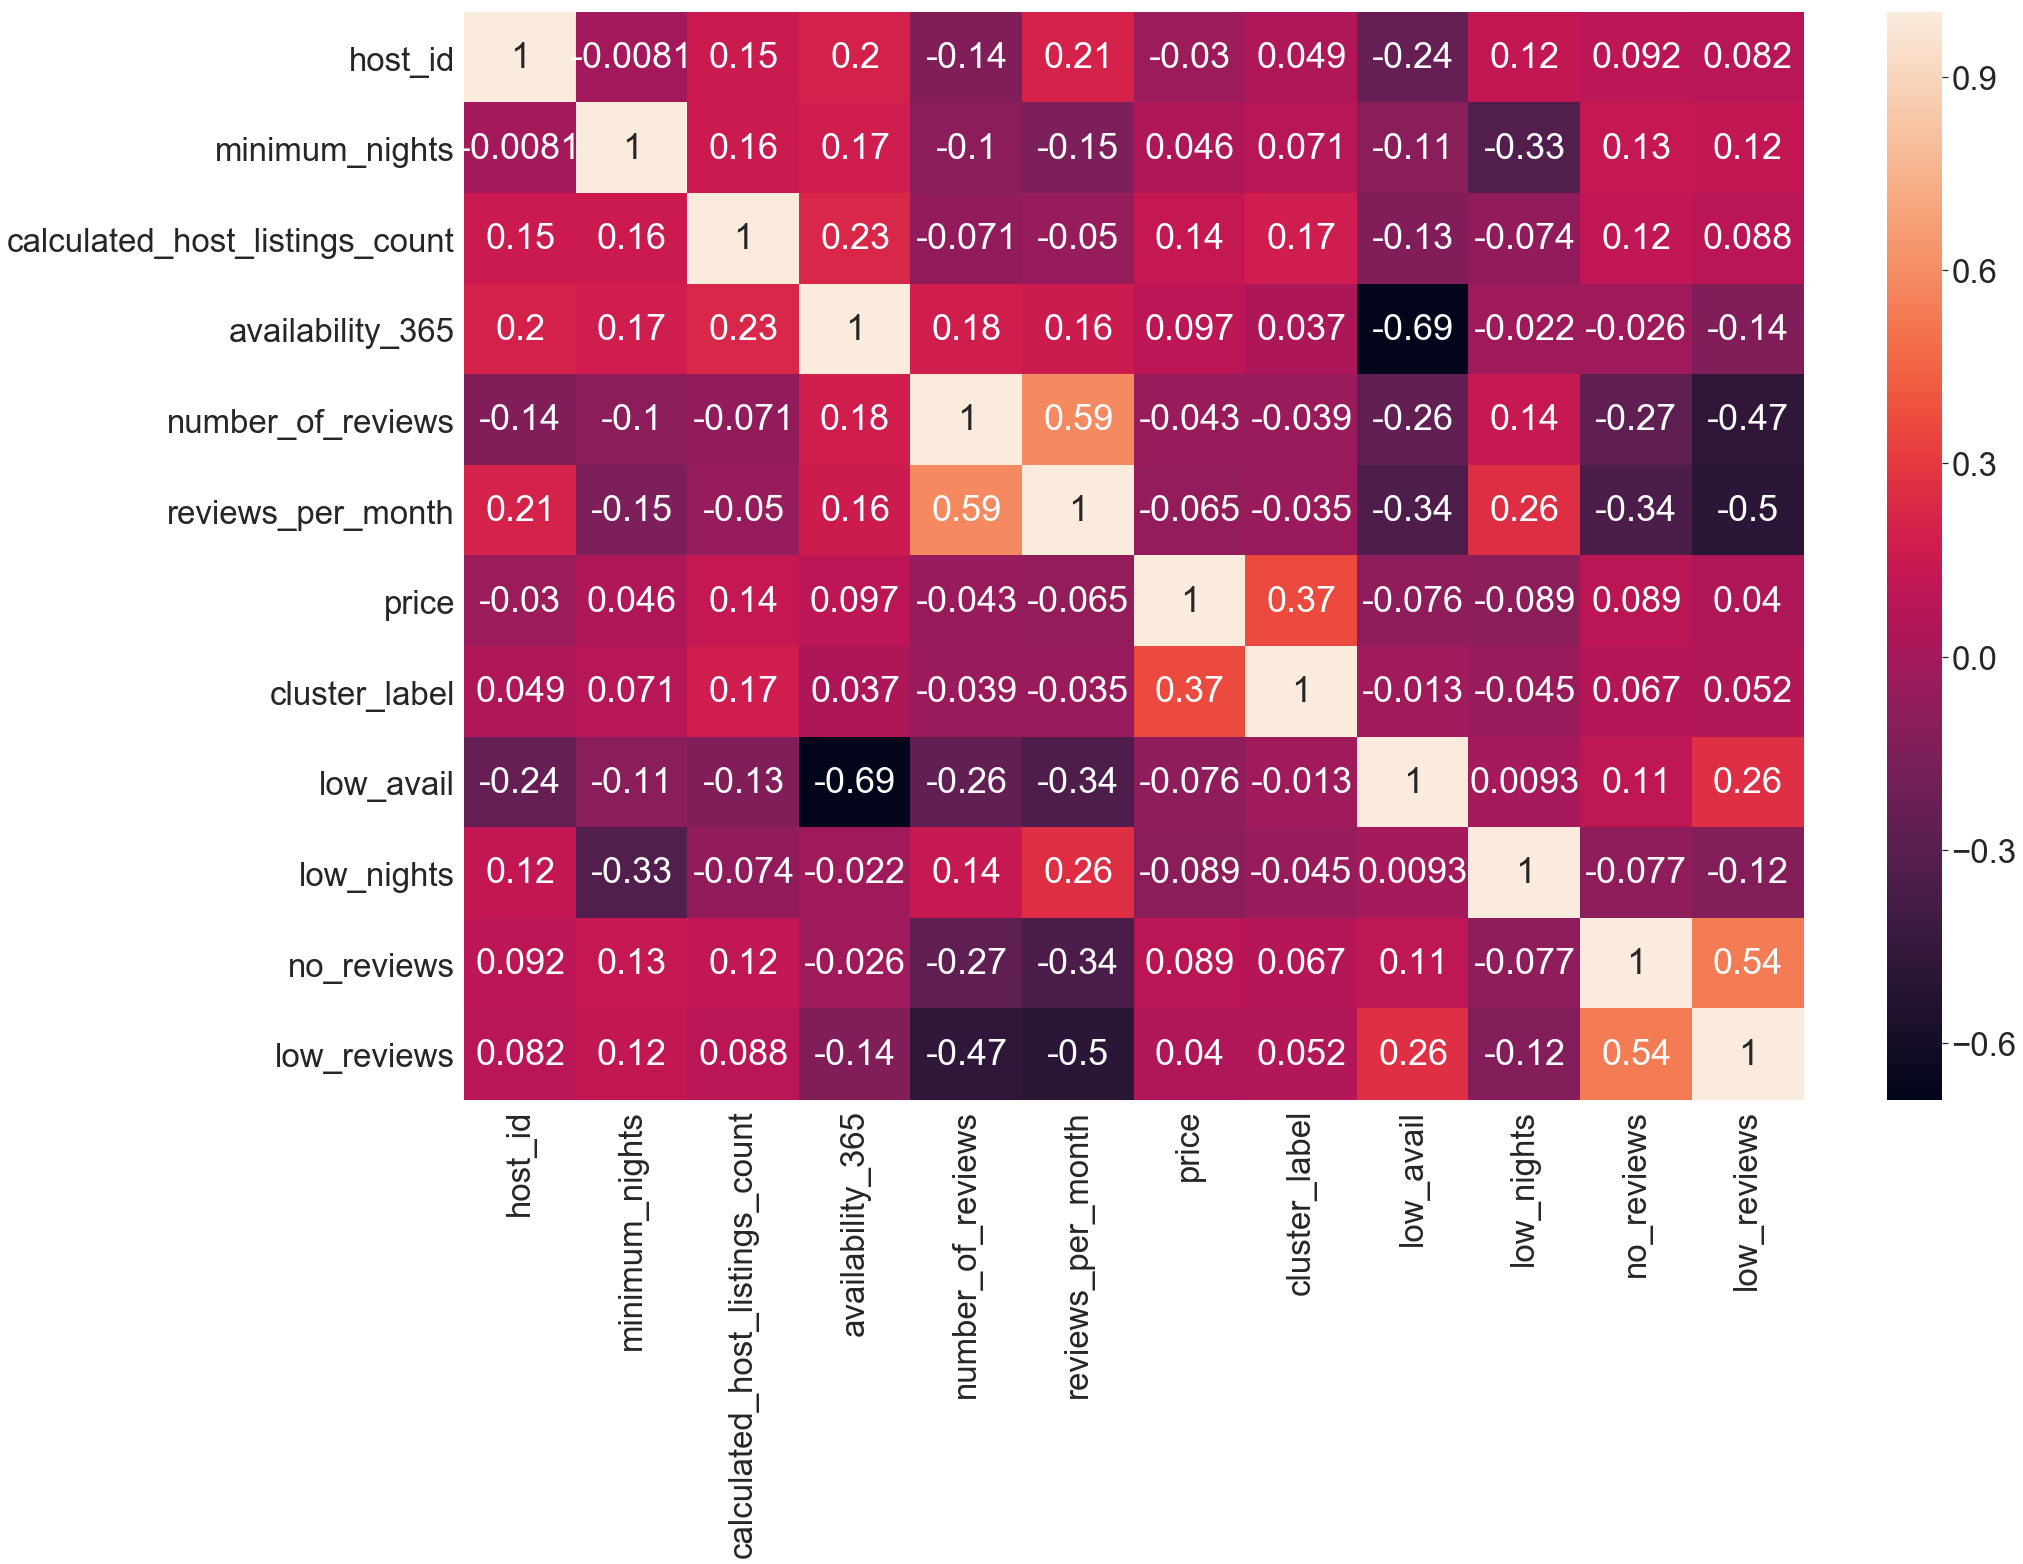

In [59]:
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(listings.corr(), annot=True)#shows heatmap. No highly correlated variables other than the low_availability, low_review,
#number_of_reviews and reviews_per_month seem to be correlated which makes since since one is the other divided by 12

In [60]:
listings.dtypes

name                               object
host_id                             int64
room_type                          object
minimum_nights                      int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews                   int64
reviews_per_month                 float64
price                             float64
cluster_label                       int32
low_avail                            bool
low_nights                           bool
no_reviews                           bool
low_reviews                          bool
area                               object
dtype: object

In [61]:
listings.head()

,name,host_id,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price,cluster_label,low_avail,low_nights,no_reviews,low_reviews,area
0,Skylit Midtown Castle,2845,Entire home/apt,1,2,288,46,0.39,5.420535,3,False,True,False,False,"Midtown,Manhattan"
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Private room,3,1,365,0,0.00,5.017280,1,False,False,True,True,"Harlem,Manhattan"
2,Cozy Entire Floor of Brownstone,4869,Entire home/apt,1,1,212,274,4.64,4.499810,0,False,True,False,False,"Clinton Hill,Brooklyn"
3,Entire Apt: Spacious Studio/Loft by central park,7192,Entire home/apt,10,1,0,9,0.10,4.394449,1,True,False,False,False,"East Harlem,Manhattan"
4,Large Cozy 1 BR Apartment In Midtown East,7322,Entire home/apt,3,1,127,75,0.60,5.303305,3,False,False,False,False,"Murray Hill,Manhattan"


In [62]:
listings.low_avail=listings.low_avail.astype(int)
listings.low_nights=listings.low_nights.astype(int)
listings.no_reviews=listings.no_reviews.astype(int)
listings.low_reviews=listings.low_reviews.astype(int)#converts booleans to 0s and 1
categorical_features = listings[['room_type','cluster_label','area']]

categorical_features = pd.get_dummies(categorical_features)


numerical_features =  listings.drop(columns=['room_type','cluster_label','area'], axis=1)
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)#separates categorical features to one hot encode them
#makes price variable the y vector. 


In [63]:
categorical_features.columns

Index(['cluster_label', 'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'area_Allerton,Bronx',
       'area_Arden Heights,Staten Island', 'area_Arrochar,Staten Island',
       'area_Arverne,Queens', 'area_Astoria,Queens',
       'area_Bath Beach,Brooklyn',
       ...
       'area_Westerleigh,Staten Island', 'area_Whitestone,Queens',
       'area_Williamsbridge,Bronx', 'area_Williamsburg,Brooklyn',
       'area_Willowbrook,Staten Island', 'area_Windsor Terrace,Brooklyn',
       'area_Woodhaven,Queens', 'area_Woodlawn,Bronx',
       'area_Woodrow,Staten Island', 'area_Woodside,Queens'],
      dtype='object', length=226)

In [64]:
one_hot = pd.get_dummies(categorical_features['cluster_label'])#one hot encodes cluster-labels

In [65]:
print(one_hot)

       0  1  2  3
0      0  0  0  1
1      0  1  0  0
2      1  0  0  0
3      0  1  0  0
4      0  0  0  1
...   .. .. .. ..
48859  0  1  0  0
48860  0  1  0  0
48861  0  0  0  1
48862  0  1  0  0
48863  0  0  0  1

[48841 rows x 4 columns]


In [66]:
categorical_features=categorical_features.drop(columns=['cluster_label'])
categorical_features=categorical_features.join(one_hot)

In [67]:
categorical_features.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,"area_Allerton,Bronx","area_Arden Heights,Staten Island","area_Arrochar,Staten Island","area_Arverne,Queens","area_Astoria,Queens","area_Bath Beach,Brooklyn","area_Battery Park City,Manhattan",...,"area_Willowbrook,Staten Island","area_Windsor Terrace,Brooklyn","area_Woodhaven,Queens","area_Woodlawn,Bronx","area_Woodrow,Staten Island","area_Woodside,Queens",0,1,2,3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
numerical_text=numerical_features.copy()
numerical_features = numerical_features.drop(['host_id','name'], axis=1)#drops 'name' column and 'host_id' column

In [69]:
transformer = RobustScaler().fit(numerical_features)
numerical_features=transformer.transform(numerical_features)#uses robust scaler to account for outliers in the prediction
#and target distributions

In [70]:
columns=['minimum_nights', 'calculated_host_listings_count','availability_365','number_of_reviews','reviews_per_month']      
numerical_df = pd.DataFrame({'minimum_nights': numerical_features[:, 0], 'calculated_host_listings_count': numerical_features[:, 1],
                            'availability_365': numerical_features[:, 2], 'number_of_reviews': numerical_features[:, 3],
                            'reviews_per_month': numerical_features[:, 4]})
#numerical_features=np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
print(numerical_features)
#numerical_df=pd.DataFrame(data=numerical_features, columns=columns)
#X=pd.concat([numerical_df, categorical_features], axis=1)

[[-0.25        1.          1.06465517 ...  0.          0.
   0.        ]
 [ 0.25        0.          1.39655172 ... -1.          1.
   1.        ]
 [-0.25        0.          0.73706897 ...  0.          0.
   0.        ]
 ...
 [-0.25        0.          0.27586207 ...  0.          1.
   1.        ]
 [-0.25        0.         -0.11637931 ...  0.          1.
   1.        ]
 [-0.25        0.          0.14224138 ...  0.          1.
   1.        ]]


In [72]:
#X.isnull().sum()

In [73]:
#percent_missing = listings.isnull().sum() * 100 / len(listings)
#print(X[X.isnull()])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
numerical_df.dtypes

minimum_nights                    float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews                 float64
reviews_per_month                 float64
dtype: object

In [74]:
categorical_features.dtypes
categorical_float_df=categorical_features.apply(pd.to_numeric, errors='coerce')
categorical_float_df.dtypes

room_type_Entire home/apt           uint8
room_type_Private room              uint8
room_type_Shared room               uint8
area_Allerton,Bronx                 uint8
area_Arden Heights,Staten Island    uint8
                                    ...  
area_Woodside,Queens                uint8
0                                   uint8
1                                   uint8
2                                   uint8
3                                   uint8
Length: 229, dtype: object

In [75]:
y.isnull().sum()#checking to make sure that there are no nulls

0

In [79]:
X=np.concatenate((numerical_features, categorical_features), axis=1)#creates X 
#X=pd.concat([numerical_df,categorical_features], axis=0)
#numerical_df.shape
#X=numerical_df.combine(categorical_features)

In [80]:
#X.isnull().sum()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#training and test split
#with a training size of 30% of dataset

In [92]:
#Simple Linear Model
regression=linear_model.LinearRegression()#linear regression model
regression.fit(X_train, y_train)#fits training set
lin_y_pred=regression.predict(X_test)#predicts test set
lin_y_pred_train=regression.predict(X_train)
print('R^2 For Training Set: %.2f'
      % regression.score(X_train, y_train))#R^2 score for training set
print('Mean squared error for Test Set: %.2f'
      % mean_squared_error(y_test, lin_y_pred))#test set prediction
print('Mean squared error for Train Set: %.2f'
      % mean_squared_error(y_train, lin_y_pred_train))

R^2 For Training Set: 0.56
Mean squared error for Test Set: 8164121273.22
Mean squared error for Train Set: 0.21


In [93]:
regression.coef_

array([-9.64923499e-03, -5.20295224e-04,  1.21439993e-01, -1.15034544e-02,
       -1.37664009e-02, -1.06201598e-01,  8.02025463e-02,  1.31515985e-01,
       -1.43628021e-03, -1.33528193e+10, -1.33528193e+10, -1.33528193e+10,
       -6.31476802e+06, -6.31476834e+06, -6.31476804e+06, -6.31476774e+06,
       -6.31476786e+06, -6.31476804e+06, -6.31476741e+06, -6.31476790e+06,
       -6.31476800e+06, -6.31476703e+06, -6.31476802e+06, -6.31476804e+06,
       -6.31476794e+06, -6.31476785e+06, -6.31476766e+06, -6.31476803e+06,
       -6.31476814e+06, -6.31476812e+06, -6.31476798e+06, -6.31476751e+06,
       -6.31476813e+06, -6.31476669e+06, -6.31476785e+06, -6.31476784e+06,
       -6.31476839e+06, -6.31476747e+06, -6.31476801e+06, -6.31476825e+06,
       -6.31476791e+06, -6.31476801e+06, -6.31476797e+06, -6.31476751e+06,
       -6.31476781e+06, -6.31476720e+06, -6.31476739e+06, -6.31476761e+06,
       -6.31476789e+06, -6.31476758e+06, -6.31476817e+06, -6.31476792e+06,
       -6.31476803e+06, -

In [94]:

lasso_params={'alpha':[0.001, 0.005, 0.0075, 0.01]}
#pipe2 = Pipeline([('poly', PolynomialFeatures()),
#                 ('fit', linear_model.Lasso())])
#lasso=GridSearchCV(pipe2, param_grid=lasso_params).fit(X_train, y_train).best_estimator_
lasso= GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(X_train, y_train)#grid search for lasso
print(lasso.best_estimator_)#shows best performing model parameters
lasso_y_pred=lasso.predict(X_test)#predicts test
lasso_y_pred_train=lasso.predict(X_train)
print('R^2 For Training Set: %.2f'
      % lasso.score(X_train, y_train))
print('Mean squared error for Test Set: %.2f'
      % mean_squared_error(y_test, lasso_y_pred))#0.23 mean squared error for Lasso model
print('Mean squared error for Train Set: %.2f'
      % mean_squared_error(y_train, lasso_y_pred_train))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R^2 For Training Set: 0.53
Mean squared error for Test Set: 0.23
Mean squared error for Train Set: 0.22


In [95]:
ridge_params = {'alpha':[1.5,1.6,1.7,1.8,1.9,2]}

#lasso=GridSearchCV(pipe2, param_grid=lasso_params).fit(X_train, y_train).best_estimator_
ridge=GridSearchCV(linear_model.Ridge(), param_grid=ridge_params).fit(X_train, y_train)#GridSearchCV for ridge
print(ridge.best_estimator_)
ridge_y_pred=ridge.predict(X_test)
ridge_y_pred_train=ridge.predict(X_train)
print('R^2 For Training Set: %.2f'
      % lasso.score(X_train, y_train))
print('Mean squared error for Test Set: %.2f'
      % mean_squared_error(y_test, ridge_y_pred))#0.22 mean squared error for Ridge
print('Mean squared error for Train Set: %.2f'
      % mean_squared_error(y_train, ridge_y_pred_train))#0.22 mean squared error for Ridge

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
R^2 For Training Set: 0.53
Mean squared error for Test Set: 0.22
Mean squared error for Train Set: 0.21


In [96]:
regr = AdaBoostRegressor(random_state=0, n_estimators=150)
regr.fit(X_train, y_train)
boost_y_pred=regr.predict(X_test)
boost_y_pred_train=regr.predict(X_train)
print('R^2 For Training Set for Test Set: %.2f'
      % regr.score(X_train, y_train))
print('Mean squared error for Test Set: %.2f'
      % mean_squared_error(y_test, boost_y_pred))#Boost regressor
print('Mean squared error for Test Set: %.2f'
      % mean_squared_error(y_train, boost_y_pred_train))

R^2 For Training Set for Test Set: 0.14
Mean squared error for Test Set: 0.41
Mean squared error for Test Set: 0.41


In [87]:
pca = PCA(n_components=2)
X_red=pca.fit_transform(X_train)
print(pca.explained_variance_ratio_.cumsum())#2 component PCA

[0.98020052 0.99358823]


In [97]:
regression=linear_model.LinearRegression()
regression.fit(X_red, y_train)
X_test_red=pca.transform(X_test)
pca_y_pred=regression.predict(X_test_red)
pca_y_pred_train=regression.predict(X_red)
print('R^2 For Training Set: %.2f'
      % regression.score(X_red, y_train))
print('Mean squared error for Test Set: %.2f'
      % mean_squared_error(y_test, pca_y_pred))#0.46 mean squared error. Performed poorly on test set
print('Mean squared error for Train Set: %.2f'
      % mean_squared_error(y_train, pca_y_pred_train))

R^2 For Training Set: 0.02
Mean squared error for Test Set: 0.46
Mean squared error for Train Set: 0.47


In [89]:
xgb = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [7, 8, 9],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250]}
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  4.8min finished
c:\users\ajeet\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'm

In [90]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 250, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [98]:
xgb_pred=xgb_grid.predict(X_test)
xgb_pred_train=xgb_grid.predict(X_train)
print('R^2 For Training Set: %.2f'
      % xgb_grid.score(X_train, y_train))
print('Mean squared error for Test Set: %.2f'
      % mean_squared_error(y_test, xgb_pred))
print('Mean squared error for Train Set: %.2f'
      % mean_squared_error(y_train, xgb_pred_train))

R^2 For Training Set: 0.67
Mean squared error for Test Set: 0.19
Mean squared error for Train Set: 0.16


In [ ]:
#The best performing model was the XGBoost Regressor with a 0.03 learning rate, a max_depth of 9, nthread of 4 and a 0.7 subsample